# Fastaudio Exploration

url:: https://fastaudio.github.io/Learning%20resources/

In [26]:
from fastaudio.augment.all import *

from fastaudio.core.all import *
from fastai.data.all import *
import fastai

In [9]:
audio_files = get_audio_files("../data/raw/train")

<AxesSubplot:>

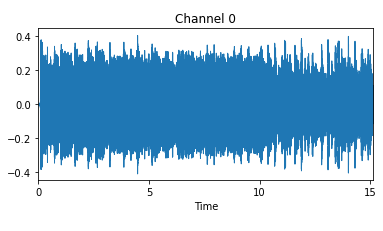

In [12]:
audio = AudioTensor.create(audio_files[0])
audio.show()

<AxesSubplot:>

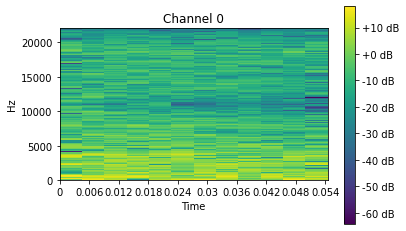

In [19]:
spectrogram = AudioToSpec.from_cfg(AudioConfig.BasicSpectrogram())(audio)
spectrogram.show()

<AxesSubplot:>

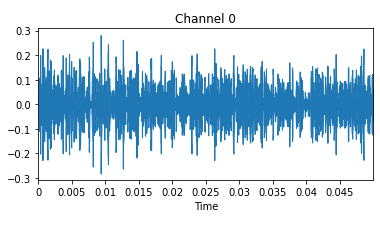

In [20]:
tfm = RemoveSilence()
tfm(audio).show()

<AxesSubplot:>

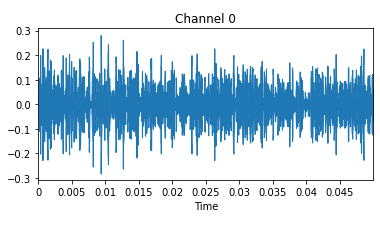

In [21]:
tfm = ResizeSignal(duration=50)
tfm(audio).show()

<AxesSubplot:>

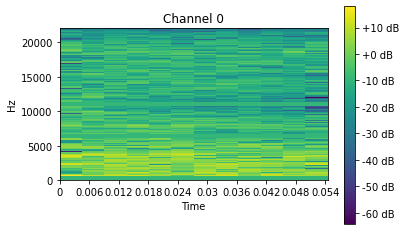

In [22]:
tfm = MaskFreq(num_masks=3, size=5)
tfm(spectrogram).show()

In [46]:
cfg = AudioConfig.BasicSpectrogram()
a2s = AudioToSpec.from_cfg(cfg)

In [35]:
DataBlock?

Init signature:
DataBlock(
    blocks=None,
    dl_type=None,
    getters=None,
    n_inp=None,
    item_tfms=None,
    batch_tfms=None,
    *,
    get_items=None,
    splitter=None,
    get_y=None,
    get_x=None,
)
Docstring:      Generic container to quickly build `Datasets` and `DataLoaders`
File:           ~/.cache/pypoetry/virtualenvs/music-processing-6AESlpXO-py3.9/lib/python3.9/site-packages/fastai/data/block.py
Type:           type
Subclasses:     


In [47]:
auds = DataBlock(blocks = (AudioBlock), 
                 batch_tfms = [a2s],
                 item_tfms = [ResizeSignal(duration=500)])

In [48]:
auds.summary(audio_files)

Setting-up type transforms pipelines
Found 127 items
2 datasets of sizes 102,25
Setting up Pipeline: partial

Building one sample
  Pipeline: partial
    starting from
      ../data/raw/train/train16.wav
    applying partial gives
      AudioTensor of size 1x1325667

Final sample: (AudioTensor([[ 2.8687e-03,  2.0142e-03,  2.8076e-03,  ...,  0.0000e+00,
         -1.2207e-04,  6.1035e-05]]),)


Found 127 items
2 datasets of sizes 102,25
Setting up Pipeline: partial
Setting up after_item: Pipeline: Resample -> DownmixMono -> ResizeSignal -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: AudioToSpec -> IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resample -> DownmixMono -> ResizeSignal -> ToTensor
    starting from
      (AudioTensor of size 1x1325667)
    applying Resample gives
      (AudioTensor of size 1x480968)
    applying DownmixMono gives
      (AudioTensor of size 1x480968)

In [49]:
dls = auds.dataloaders(audio_files)

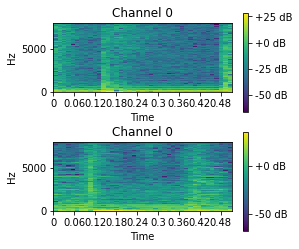

In [50]:
dls.show_batch()

In [43]:
dls.train

In [44]:
len(dls.train)

1

## Conclusion

Just installing the fastaudio library and trying the example code from the tutorial produced so much errors, that I think It is a better idea to switch to Signal Processing.